# Práctica 3
## Objetivos
1. Calcular la solución numérica de una EDO y representarla. 
2. Representar el campo de direcciones del sistema. Dibujar una o varias soluciones sobre dicho campo de direcciones.
3. Encontrar los puntos críticos y las soluciones de equilibrio y reprersentarlos.

## Tabla de comandos

|**NOMBRE**|**DESCRIPCIÓN**|
|:---:|:---:|
|[odeint](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)|Procedimiento de resolución numérica de EDOs del módulo integrate|
|[linspace(a, b, N)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)|Devuelve una lista de N puntos entre dos valores a y b|
|[meshgrid(PtoX, PtoY)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)|Define una malla de puntos a partir de una lista de puntos en X y en Y|Función |
|[quiver(X, Y, U, V, scale)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html)|Imprime los vectores velocidades definidas en la malla X, Y con valor vectorial U, V con la escala dada|
|[plot(X, Y, tipo)](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html)|Dibuja una linea de puntos definida por unos valores X e Y y un tipo de linea|

Cargamos los módulos necesarios: cálculo simbólico, numérico de manejo de matrices, integración de ecuaciones, gráficos. Ademas instruimos a Jupyter para que devuelva expresiones matemáticas en formato más legible con `sp.init_printing()` 

In [1]:
import sympy as sp
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sp.init_printing()

__Función para presentar un campo de vectores de una ecuación diferencial del tipo:__

$$y'=f(x,y)$$

### Se va a mostrar el <b>campo de direcciones</b> en el plano dibujando los vectores de las tangentes en una malla de puntos.<br> 
<b> <u> Campo de Direcciones </u> </b>
<ul>
    <li> <b>Malla de Puntos</b>: Se determina una malla de puntos utilizando la función <b>meshgrid</b>.</li>
    <ul> <li><b>Parámetros de entrada</b>: la lista de $n$ <b>Tiempos</b> en el eje OX y la lista de $m$ <b>Poblaciones</b> en el eje OY</li> </ul>
    <ul> <li><b>Retorna</b>: Una matriz $n\cdot m$ de los valores de tiempo de la posición de la malla sobre <b>T</b> y otra matriz $n\cdot m$ con el valor de la población sobre <b>Y</b></li> </ul>
</ul>
<ul>
    <li> <b>Vectores Dirección</b>: A partir de los puntos de la malla guardados en <b>T</b> e <b>Y</b> se determina en cada punto el vector dirección $(1,y')$:</li>
    <ul> <li><b>Coordenada U</b>: matriz $n\cdot m$ de unos</li> </ul>
    <ul> <li><b>Coordenada V</b>: matriz $n\cdot m$ con la pendiente $y'$ que da la función diferencial <b>F</b></li></ul>   
    <ul> <li><b>Normalización del vector (U,V)</b>: Opcionalmente se puede hacer unitario el vector (U,V)</li></ul> 

</ul>
<ul>
    <li> <b>Representación del campo de vectores</b>: La función <b>quiver</b> permite representar el campo de vectores <b>(U,V)</b> cuya posición viene dada por la malla <b>(T,Y)</b> se adopta el parámetro <b>angles="xy"</b></li>
</ul>
<ul>
    <li> <b>Soluciones Particulares</b>: Finalmente se representan las soluciones particulares que en el tiempo $t=0$ parten de cada uno de los valores iniciales $y_0$ o parten de un ($t_0$, $y_0$). En el primer caso de dará una lista de valores $y$, y en el segundo caso una lista de doble dimensión con los posibles valores ($x$,$y$)</li>



In [2]:
def Euler(f, x, y_0):
    y = [0 for i in x]
    y[0]=y_0
    for i in range(len(x)-1):
        y[i+1] = y[i] + f(x[i], y[i])*(x[i+1]-x[i])
    return y
def CampoVectores(f, x_ini, x_has, y_ini, y_has, xy_0, k_0=1.0, _xlabel="", _ylabel="", _title=""):
    
    assert x_ini < x_has, "Error! x_ini debe ser menor que x_has"
    assert y_ini < y_has, "Error! y_ini debe ser menor que y_has"
    
    # Malla rectangular de puntos.
    X, Y = np.meshgrid(np.linspace(x_ini, x_has, 10),  np.linspace(y_ini, y_has, 10))
    
    # Componentes del vector de dirección (1, Y')
    # La primera componente es 1. Construimos una matriz de unos compatible con las dimensiones de X e Y
    U = np.ones([10, 10])
    # La segunda componente de la dirección se obtiene con la función y'=f(x,y)
    V = f(X,Y)
    # Se normaliza la dirección (se hace que su módulo sea unitario)
    Un = U /(U**2+V**2)**0.5
    Vn = V /(U**2+V**2)**0.5
    U = Un
    V = Vn
    
    # Tamaño relativo del gráfico
    plt.figure(figsize = (9,9))

    # El campo de direcciones en el plano es la representación de una función vectorial.
    # Es una función de  dos variables con valores vectoriales de dos componentes.
    plt.quiver(X, Y, U, V, angles="xy")
    for xy0 in xy_0:
        # Lista de valores para solución particular (a partir de x=0)
        if type(xy0)==list:
            x0=xy0[0]
            y0=xy0[1]
        else:
            x0=0
            y0=xy0
        X0 = np.linspace(x0, x_has*k_0, 100)
        Ps = Euler(f, X0, y0)
        plt.plot(X0, Ps, "-")

    # Mostramos la figura
    if (_xlabel!=""): plt.xlabel(_xlabel)
    if (_ylabel!=""): plt.ylabel(_ylabel)
    if (_title!=""): plt.title(_title)
    plt.show()

## 1. Crecimiento Poblacional

El modelo más sencillo de **crecimiento poblacional** es aquel donde la tasa de crecimiento es **proporcional a la población**. La ecuación diferencial tiene la forma

$$
\frac{dy}{dt} = ky
$$




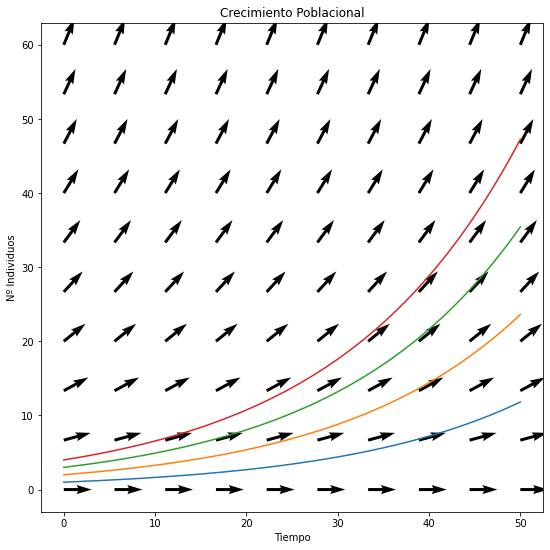

In [3]:
# Damos un valor a k
k=0.05

# La función 'F' del sistema y el vector 'P' que se compone de las funciones desconocidas 'x(t)', 'y(t)'
def F(t, y):
    return k*y
_xlab="Tiempo"
_ylab="Nº Individuos"
_tit="Crecimiento Poblacional"
CampoVectores(F, x_ini=0, x_has=50, y_ini=0, y_has=60, xy_0=[1,2,3,4], _xlabel=_xlab,_ylabel=_ylab,_title=_tit)

### 1.1 Calcular simbólicamente la solución general
**Solución General que requiere:**
<ul>
    <li> <b>Variable indepediente</b>: Se define $t$ utilizando <b>symbols</b> de sympy.</li>
    <li> <b>Variable depediente</b>: Se define $y$ utilizando <b>Function</b> de sympy.</li>    
    <li> <b>Ecuación diferencial</b>: En <b>edo</b> se guarda la ecuación $\frac{dy}{dt} - 0,05\cdot y$ </li>
    <li> <b>Obtención de la Ecuación General</b>: Con <b>dsolve</b> de sympy se obtiene la ecuación general </li>
</ul>

In [16]:
t = sp.symbols('t')
y = sp.Function('y')
edo = y(t).diff() - k*y(t)
sp.dsolve(edo)

## 1.2 Comparación entre la solución de Euler, ODEINT y solución exacta

La función odeint (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) cuyos parámetros más importantes son:

- __func__: una función llamable con $\frac{dy}{dx}$
- __y0__: un valor o array con los valores iniciales
- __t__: Una secuencia de puntos de tiempo para los cuales resolver y. El punto de valor inicial debe ser el primer elemento de esta secuencia. Esta secuencia debe ser monótonamente creciente o monótonamente decreciente; se permiten valores repetidos.



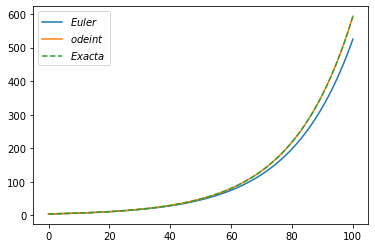

In [19]:
y0=4
T0 = np.linspace(0, 100, 100)
y_eu = Euler(F, T0, y0)
f_od = lambda y, t: k*y  ## Función con el formato (y,t) que espera odeint
y_od = scint.odeint(f_od, y0, T0)
f_ex = lambda t: y0*np.e**(k*t)
y_ex = [f_ex(t) for t in T0]
# Representación de las 3 soluciones
plt.plot(T0,y_eu, label="$Euler$")
plt.plot(T0,y_od ,label="$odeint$")
plt.plot(T0,y_ex,"--", label="$Exacta$")
plt.legend()
plt.show()

## 2. Desintegración Radiactiva
El caso de desintegración radiactiva es similar al crecimiento poblacional pero haciendo $k<0$:

$$
\frac{dy}{dt} = ky
$$


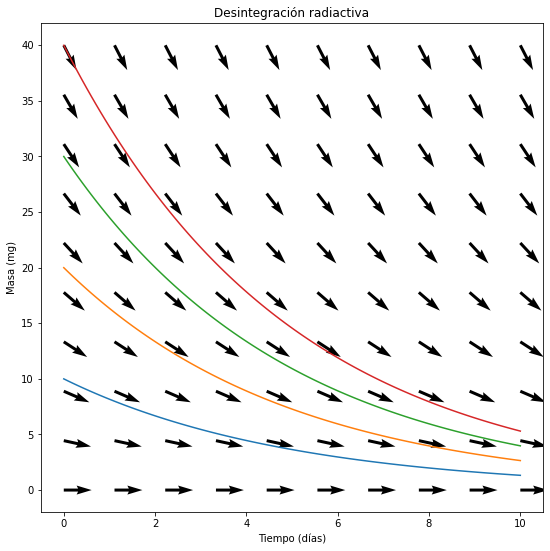

In [23]:
# Damos un valor a k
k=-0.2

# La función 'F' del sistema y el vector 'P' que se compone de las funciones desconocidas 'x(t)', 'y(t)'
def F(t, y):
    return k*y

_xlab="Tiempo (días)"
_ylab="Masa (mg)"
_tit="Desintegración radiactiva"
CampoVectores(F, x_ini=0, x_has=10, y_ini=0, y_has=40, xy_0=[10,20,30,40],_xlabel=_xlab,_ylabel=_ylab,_title=_tit)

## 2. Ley de Newton de Enfriamiento

La ley de Newton de Enfriamiento viene dada por

$$
\frac{dT}{dt} = -k(T - T_A)
$$

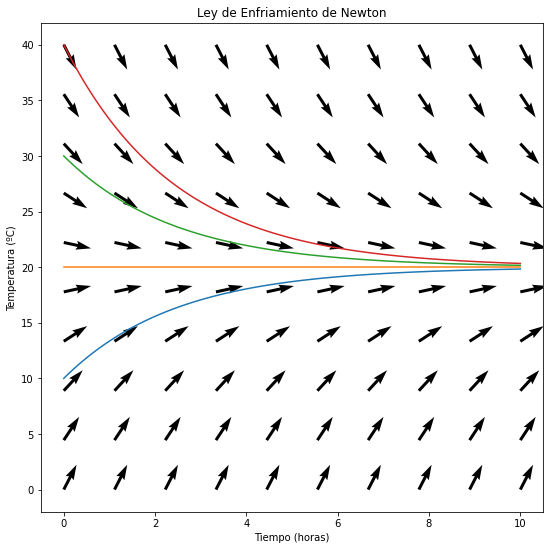

In [27]:
# Damos un valor a k y Ta
k=0.4
Ta=20

# La función 'F' del sistema y el vector 'P' que se compone de las funciones desconocidas 'x(t)', 'y(t)'
def F(t, T):
    return -k*(T-Ta)

_xlab="Tiempo (horas)"
_ylab="Temperatura (ºC)"
_tit="Ley de Enfriamiento de Newton"
CampoVectores(F, x_ini=0, x_has=10, y_ini=0, y_has=40, xy_0=[10,20,30,40],_xlabel=_xlab,_ylabel=_ylab,_title=_tit)

## 3. Ecuación Logistica

El crecimiento poblacional si existe una capacidad máxima de población (dado por M) es 

$$
\frac{1}{P}\frac{dP}{dt} = k(1 - \frac{P}{M})
$$

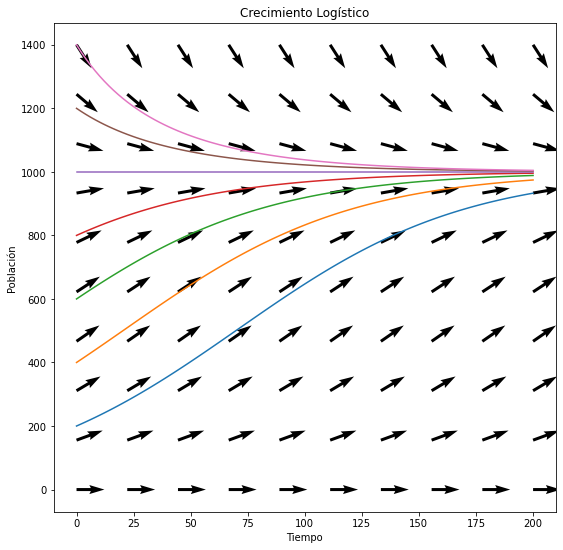

In [28]:
# Damos un valor a k y M
k=0.02
M=1000

# La función 'F' del sistema y el vector 'P' que se compone de las funciones desconocidas 'x(t)', 'y(t)'
def F(t, P):
    return k*P*(1-(P/M))

xy_0=[200,400,600,800,1000, 1200, 1400]
_xlab="Tiempo"
_ylab="Población"
_tit="Crecimiento Logístico"
CampoVectores(F, x_ini=0, x_has=200, y_ini=0, y_has=1400, xy_0=xy_0,_xlabel=_xlab,_ylabel=_ylab,_title=_tit)

## 4. Mezcla de Gases

La concentración de un gas en un recipiente donde hay entrada de un gas (con una tasa $r_e$) y salida de la mezcla (con una tasa $r_s$) puede darse en una versión simplificada por la ecuación

$$
\frac{dy}{dt} = r_e - r_s \cdot y
$$

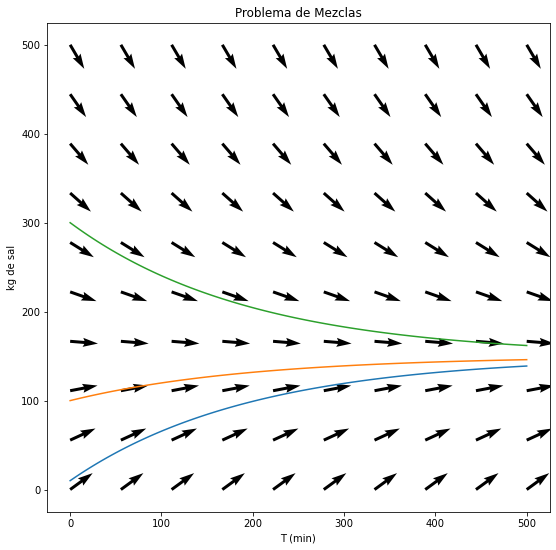

In [30]:
# Damos un valor a re y rs
re=0.75
rs=1/200

# La función 'F' del sistema y el vector 'P' que se compone de las funciones desconocidas 'x(t)', 'y(t)'
def F(t, y):
    return re - rs*y

xy_0=[10,100,300]
_xlab="T (min)"
_ylab="kg de sal"
_tit="Problema de Mezclas"
CampoVectores(F, x_ini=0, x_has=500, y_ini=0, y_has=500, xy_0=xy_0,_xlabel=_xlab,_ylabel=_ylab,_title=_tit)